In [4]:
points = [(0.1,0.09950042), (0.2,0.19601332), (0.3,0.28660095), (0.4,0.36842440), (0.5,0.43879128), (0.6,0.49520137)]
tipos = [0, 1, 1, 1, 1, 2]

In [39]:
def TaylorOrdenDos(points, x, h, tipo = 0):
    assert(len(points) >= 3)
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    assert(0 <= tipo <= 2)
    if tipo == 0: # Hacia adelante
        coef = [-3, 4, -1]
    elif tipo == 1: # Central
        coef = [-1, 0, 1]
    else: # Hacia atrás
        coef = [1, -4, 3]
    start = x - tipo * h
    ans = 0
    pos = 0
    for i in range(3):
        while pos < len(X) and X[pos] < start + 1e-9:
            pos += 1
        pos -= 1
        if pos == len(points) or abs(X[pos] - start) > 1e-9:
            assert(False)
        ans += Y[pos] * coef[i]
        start += h
    return ans / 2 / h

In [40]:
h = 0.1
puntosT2 = []

for i in range(len(points)):
    puntosT2.append((points[i][0], TaylorOrdenDos(points, points[i][0], h, tipos[i])))

print(puntosT2)

[(0.100000000000000, 0.994755350000000), (0.200000000000000, 0.935502650000000), (0.300000000000000, 0.862055400000000), (0.400000000000000, 0.760951650000000), (0.500000000000000, 0.633884850000000), (0.600000000000000, 0.494316949999999)]


In [42]:
# Parse polynomial with coefficients

def parsePoly(poly):
    var('x')
    ans = 0
    mono = 1;
    for i in range(len(poly.list())):
        ans += poly.list()[i] * mono
        mono *= x
    return ans

In [47]:
# Plot polynomials

def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=classic_colors[i])
    show(a)

In [48]:
def Lagrange(points):
    #x = R.0
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

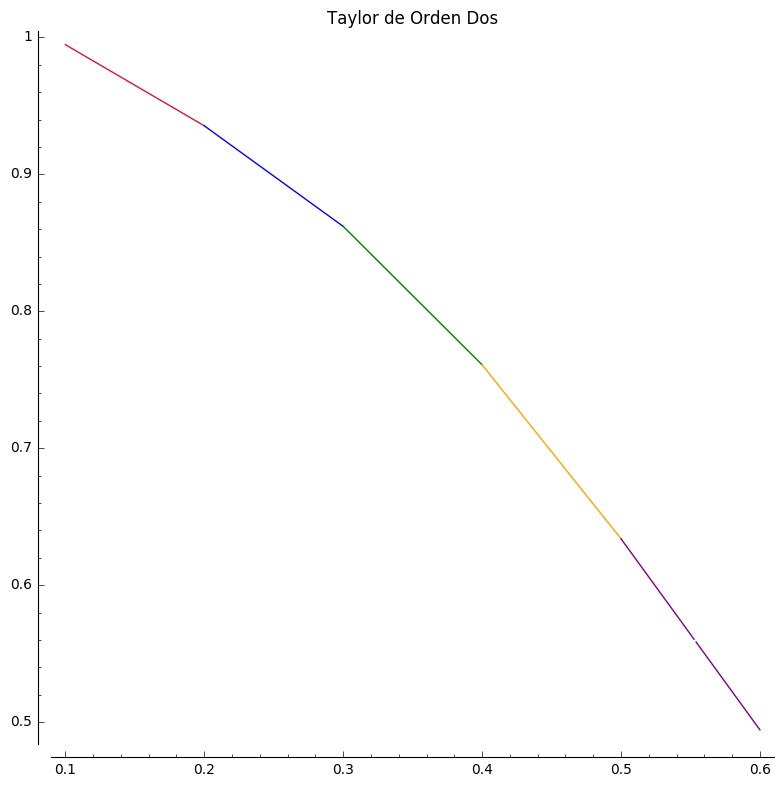

In [56]:
polys = []
L = []
R = []

for i in range(len(puntosT2)-1):
    P = Lagrange([puntosT2[i], puntosT2[i+1]])
    polys.append(P)
    L.append(puntosT2[i][0])
    R.append(puntosT2[i+1][0])

plotPoly(polys, "Taylor de Orden Dos", L, R)

In [50]:
def TaylorOrdenCuatro(points, x, h, tipo = 0):
    assert(len(points) >= 5)
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    assert(0 <= tipo <= 2)
    if tipo == 0: # Hacia adelante
        coef = [2, -5, 4, -1]
    elif tipo == 1: # Central
        coef = [-1, 16, -30, 16, -1]
    else: # Hacia atrás
        coef = [1, -4, 3]
    start = x - tipo * h
    ans = 0
    pos = 0
    for i in range(3):
        while pos < len(X) and X[pos] < start + 1e-9:
            pos += 1
        pos -= 1
        if pos == len(points) or abs(X[pos] - start) > 1e-9:
            assert(False)
        ans += Y[pos] * coef[i]
        start += h
    return ans / 2 / h

In [59]:
def TresPuntos(points, x, h, tipo = 0):
    assert(len(points) >= 3)
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    assert(0 <= tipo < 2)
    if tipo == 0:
        coef = [-3, 4, -1]
    else:
        coef = [-1, 0, 1]
    start = x - tipo * h
    ans = 0
    pos = 0
    for i in range(3):
        while pos < len(X) and X[pos] < start + 1e-9:
            pos += 1
        pos -= 1
        if pos == len(points) or abs(X[pos] - start) > 1e-9:
            assert(False)
        ans += Y[pos] * coef[i]
        start += h
    return ans / 2 / h

In [61]:
def CincoPuntos(points, x, h, tipo = 0):
    assert(len(points) >= 5)
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    assert(0 <= tipo < 5)
    if tipo == 0:
        coef = [-25, 48, -36, 16, -3]
    elif tipo == 1:
        coef = [-3, -10, 18, -6, 1]
    elif tipo == 2:
        coef = [1, -8, 0, 8, 1]
    elif tipo == 3:
        coef = [4, 6, -8, 34, 3]
    else:
        coef = [1, -3, 4, -36, 25]
    start = x - tipo * h
    ans = 0
    pos = 0
    for i in range(5):
        while pos < len(X) and X[pos] < start + 1e-9:
            pos += 1
        pos -= 1
        if pos == len(points) or abs(X[pos] - start) > 1e-9:
            assert(False)
        ans += Y[pos] * coef[i]
        start += h
    return ans / 12 / h

In [67]:
h = 0.1
puntosTresPuntos = [0, 1, 1, 1, 1, 2]
tiposTP = []

for i in range(len(points)):
    puntosTresPuntos.append((points[i][0], TaylorOrdenDos(points, points[i][0], h, tiposTP[i])))

print(puntosTP)

polys = []
L = []
R = []

for i in range(len(points)-1):
    P = Lagrange([points[i], points[i+1]])
    polys.append(P)
    L.append(points[i][0])
    R.append(points[i+1][0])

plotPoly(polys, "Metodo de los Tres puntos", L, R)

IndexError: list index out of range

[(0.100000000000000, 0.984926016666665), (0.200000000000000, 0.940356266666667), (0.300000000000000, 1.59798361666667), (0.400000000000000, 1.59061444166667), (0.500000000000000, 13.3006428416667), (0.600000000000000, -2.17211980000000)]


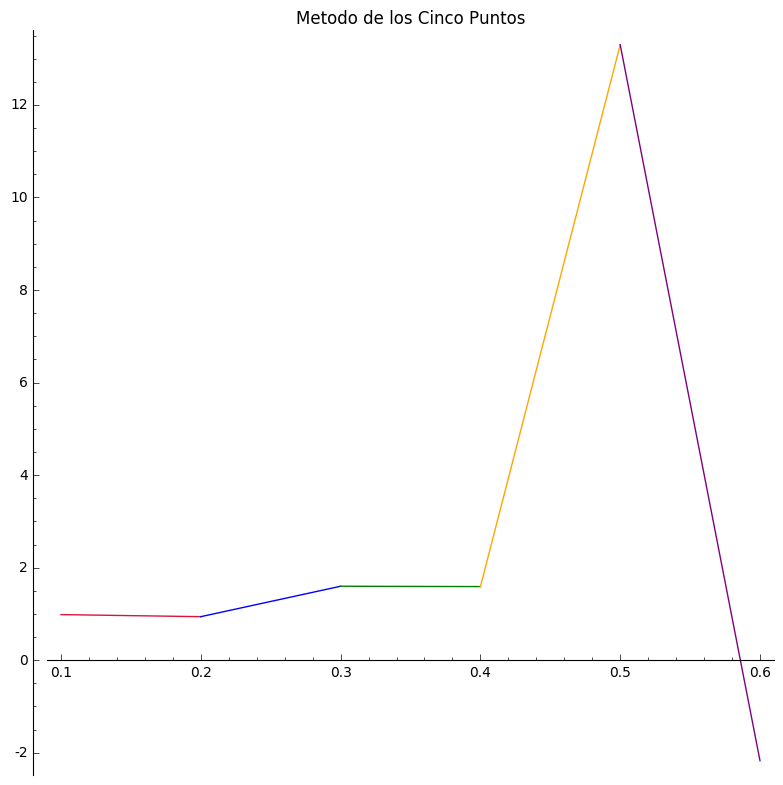

In [65]:
h = 0.1
puntosCincoPuntos = []
tiposCP = [0, 1, 2, 2, 3, 4]

for i in range(len(points)):
    puntosCincoPuntos.append((points[i][0], CincoPuntos(points, points[i][0], h, tiposCP[i])))

print(puntosCincoPuntos)

polys = []
L = []
R = []

for i in range(len(puntosCincoPuntos)-1):
    P = Lagrange([puntosCincoPuntos[i], puntosCincoPuntos[i+1]])
    polys.append(P)
    L.append(puntosCincoPuntos[i][0])
    R.append(puntosCincoPuntos[i+1][0])

plotPoly(polys, "Metodo de los Cinco Puntos", L, R)